# Scientific Diversification

- The most attractive portfolio is the **Maximum Sharpe Ratio** portfolio. Though it is hard to estimate because of the complexity of expected returns.

- Another good portfolio option is the **Global Minimum Variance** portfolio. We can apply different techniques to diversify when constructing a minimum variance portfolio. 

# Measuring Risk Contributions

- Well balanced portfolios in terms of dollar contributions can be highly concentrated in terms of risk contributions.

- It is always useful to know the contribution of each asset to the risk of the portfolio.

# Risk Parity Portfolios

- Risk Parirty Portfolios are well balanced portfolios considering the risk contributions. 

- Risk Parity Portfolios tend to overweight less risky components.

- Risk Parity Portfolios are very popular in practice.

- They are extremely popular in practice because they tend to be more risk efficient than traditional market benchmarks.

# Comparing Portfolios

- Cap weighted portfolios are not the best type of portfolios because of their excessive concentration

- One can use a variety of diversification methodologies to build more efficient portfolios. EW, GMV, ERP, etc.

In [41]:
import numpy as np
import pandas as pd

import risk_kit as erk

%load_ext autoreload
%autoreload 2
inds = ['Food', 'Beer', 'Smoke', 'Games', 'Books', 'Hshld', 'Clths', 'Hlth',
       'Chems', 'Txtls', 'Cnstr', 'Steel', 'FabPr', 'ElcEq', 'Autos', 'Carry',
       'Mines', 'Coal', 'Oil', 'Util', 'Telcm', 'Servs', 'BusEq', 'Paper',
       'Trans', 'Whlsl', 'Rtail', 'Meals', 'Fin', 'Other']
inds=['Food', 'Hlth', 'Fin','Rtail','Whlsl']
ind_rets = erk.get_ind_returns(weighting="vw", n_inds=49)["2014":]
ind_mcap = erk.get_ind_market_caps(49, weights=True)["2014":]

cov = ind_rets.cov()


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [46]:
ax = erk.risk_contribution(erk.weight_cw(ind_rets, ind_mcap), cov)
ax.sort_values()

Gold     0.000094
FabPr    0.000291
Coal     0.000826
Books    0.001166
Txtls    0.001290
Ships    0.001365
Toys     0.001698
Rubbr    0.001939
Guns     0.002413
Boxes    0.002599
Agric    0.002749
RlEst    0.002845
PerSv    0.003219
Hlth     0.004441
Mines    0.004738
Beer     0.004937
Steel    0.005038
BldMt    0.005933
Soda     0.006043
Smoke    0.006131
Clths    0.006391
Cnstr    0.007450
ElcEq    0.007724
Fun      0.009801
Food     0.010076
Util     0.010257
Meals    0.010397
Paper    0.011071
Hshld    0.011197
MedEq    0.013458
Whlsl    0.013601
Aero     0.014875
LabEq    0.015426
Autos    0.016304
Hardw    0.019333
BusSv    0.021439
Chems    0.024999
Trans    0.026470
Fin      0.027692
Mach     0.030154
Insur    0.038640
Other    0.041063
Telcm    0.045711
Chips    0.062819
Rtail    0.067192
Oil      0.085238
Drugs    0.089100
Softw    0.098402
Banks    0.103966
dtype: float64

<Axes: title={'center': 'Risk Contributions of an EW portfolio'}>

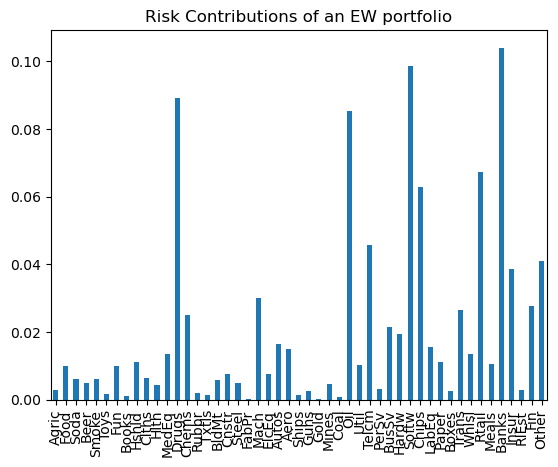

In [47]:
ax.plot.bar(title="Risk Contributions of an EW portfolio")

In [48]:
ax = erk.risk_contribution(erk.weight_ew(ind_rets, ind_mcap), cov)
ax.sort_values()

Util     0.005916
Smoke    0.009393
Hshld    0.010492
Beer     0.010500
Food     0.011227
Soda     0.012041
Gold     0.012449
Clths    0.012855
Meals    0.013261
Telcm    0.015910
Other    0.015948
Guns     0.015950
Agric    0.016982
Hlth     0.017251
Softw    0.017357
MedEq    0.017747
Insur    0.018249
Rtail    0.019039
Drugs    0.019058
PerSv    0.019258
Chips    0.020140
Hardw    0.020570
BusSv    0.020757
Whlsl    0.020881
Paper    0.021104
Aero     0.021306
LabEq    0.021497
Rubbr    0.021541
Banks    0.021622
Fun      0.022200
Fin      0.022416
Trans    0.022935
Autos    0.023338
Toys     0.023371
Oil      0.023372
Cnstr    0.024585
Books    0.024772
Boxes    0.025176
Chems    0.026042
ElcEq    0.026376
Txtls    0.026679
RlEst    0.026693
FabPr    0.027473
Mach     0.027558
BldMt    0.028106
Mines    0.028641
Coal     0.029025
Ships    0.030005
Steel    0.030938
dtype: float64

In [53]:
ind_rets.columns[(erk.weight_erc(ind_rets, cov_estimator=erk.sample_cov) ==erk.weight_erc(ind_rets, cov_estimator=erk.sample_cov).min())]

Index(['Steel'], dtype='object')

In [52]:
erc_weights = erk.weight_erc(ind_rets, cov_estimator=erk.sample_cov)
erc_weights.max()

0.05215573493070774

In [58]:
cov = erk.sample_cov(ind_rets)
ax = erk.risk_contribution(erk.weight_cw(ind_rets, ind_mcap), cov)
ax.max()-ax.min()

0.10387213196831606

In [55]:
0.041063-0.002749

0.038314

In [33]:
0.220985-0.133992

0.08699299999999999

In [59]:
ax = erk.risk_contribution(erk.weight_ew(ind_rets, ind_mcap), cov)
ax.max()-ax.min()

0.02502175762491148